## KPI (key performance indicators) 
are metrics you track to measure the success of your performance and whether you're achieving your objectives.

- They support your main goals.

- They answer two main questions: 
     - What are you trying to achieve?
     - What would success look like?

## S.M.A.R.T

- Specific
- Measurable
- Attainable
- Relevant
- Time-bound

Reduce classic bike trips without endstation with 10% in the next 3 month

- Specific: Classic Bike trips with no end station
- Measurable: 10%
- Attainable:  need investigation
- Relevant: Not to loose bikes
- Time-bound: 3 month



In [3]:
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import requests

url08 ='https://s3.amazonaws.com/capitalbikeshare-data/202308-capitalbikeshare-tripdata.zip'
url09='https://s3.amazonaws.com/capitalbikeshare-data/202309-capitalbikeshare-tripdata.zip'
url10='https://s3.amazonaws.com/capitalbikeshare-data/202310-capitalbikeshare-tripdata.zip'

def import_csv_from_zip (url):
    r = requests.get(url)
    buf1 = BytesIO(r.content)
    with ZipFile(buf1, "r") as f:
        for name in f.namelist():
            if name.endswith('.csv'):
                with f.open(name) as zd:
                    df = pd.read_csv(zd)
                    return df
            

In [4]:
trip08=import_csv_from_zip(url08)
trip09=import_csv_from_zip(url09)
trip10=import_csv_from_zip(url10)


In [5]:


trip_import08= trip08.copy()
trip_import09= trip09.copy()
trip_import10= trip10.copy()

def to_datetime_start_end (df):
    df['started_at']= pd.to_datetime(df['started_at'])
    df['ended_at']= pd.to_datetime(df['ended_at'])
    

to_datetime_start_end(trip_import08)
to_datetime_start_end(trip_import09)
to_datetime_start_end(trip_import10)


<Axes: >

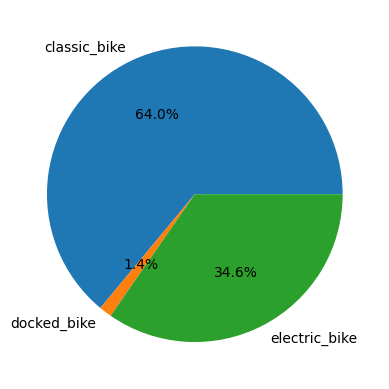

In [21]:


frames = [trip_import08, trip_import09,trip_import10]





trips08_10 = pd.concat(frames, ignore_index=True)
trips08_10['hour']=trips08_10['started_at'].dt.hour
trips08_10.groupby('rideable_type').size().plot(kind='pie', autopct='%.1f%%')

In [22]:
classicbikes = trips08_10[trips08_10['rideable_type']=='classic_bike']


classicbikes.head()



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour
0,D88F352076694FFC,classic_bike,2023-08-03 17:33:41,2023-08-03 18:03:07,5th St & Massachusetts Ave NW,31265.0,20th & Columbia Rd NW,31133.0,38.900930,-77.018677,38.918036,-77.045487,member,17
1,6B733406B1E19446,classic_bike,2023-08-16 08:19:26,2023-08-16 08:34:07,5th & K St NW,31600.0,23rd & E St NW,31260.0,38.903040,-77.019027,38.896104,-77.049882,member,8
2,56145CE76A7B5A66,classic_bike,2023-08-25 08:19:20,2023-08-25 08:37:11,5th & K St NW,31600.0,23rd & E St NW,31260.0,38.903040,-77.019027,38.896104,-77.049882,member,8
3,11B7E5D90AE9DBE5,classic_bike,2023-08-15 17:56:22,2023-08-15 18:13:58,23rd & E St NW,31260.0,5th & K St NW,31600.0,38.896104,-77.049882,38.903040,-77.019027,member,17
4,D934138EBBF5BE96,classic_bike,2023-08-12 15:38:38,2023-08-12 15:46:22,5th & K St NW,31600.0,11th & O St NW,31286.0,38.903040,-77.019027,38.908431,-77.027088,member,15


In [23]:
classicbikes['lost'] = classicbikes['end_lat'].apply(lambda value: 1 if pd.isna(value) else 0)


classicbikes.info()

<Axes: >

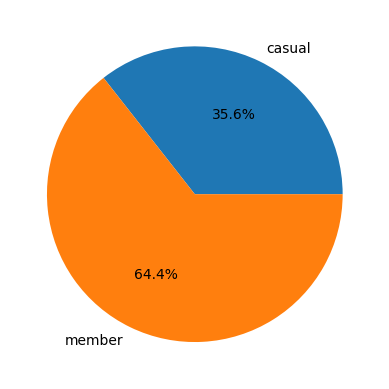

In [ ]:
classicbikes.groupby('member_casual').size().plot(kind='pie', autopct='%.1f%%')

<Axes: >

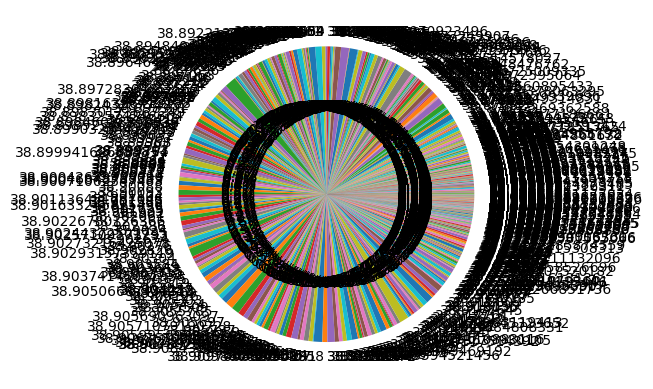

In [ ]:
classicbikes.groupby('end_lat').size().plot(kind='pie', autopct='%.1f%%')

## filter lost classic bikes

In [ ]:
def no_return_classic_df(df):
    # boolean mask for bikes with no end station
    no_end_trip = df['end_station_name'].isnull()
    # df with trips with no endstation
    trips_no_end_filtered = df[no_end_trip]
    # bike type for bikes with no end station
    by_bike_trips_no_end_filtered=trips_no_end_filtered['rideable_type'].value_counts()
    trips_no_end_classic = trips_no_end_filtered[trips_no_end_filtered['rideable_type']=='classic_bike']
    print(by_bike_trips_no_end_filtered)
    return trips_no_end_classic

no_return=no_return_classic_df(classicbikes)



no_return.head()


rideable_type
classic_bike    1751
Name: count, dtype: int64


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,lost
2842,1D1E094A1D8DE86D,classic_bike,2023-08-03 09:34:08,2023-08-04 10:34:04,S Four Mile Run Dr & Shirlington Rd,31057.0,NaN,NaN,38.844400,-77.085931,NaN,NaN,member,1
2849,15D70800635C037B,classic_bike,2023-08-17 16:45:53,2023-08-18 17:45:48,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,NaN,NaN,38.888774,-77.028694,NaN,NaN,casual,1
2910,C5ABDEF69D8B4170,classic_bike,2023-08-22 17:11:54,2023-08-23 18:11:30,Medical Center Metro,32053.0,NaN,NaN,38.999378,-77.097882,NaN,NaN,casual,1
2939,11EB8BEBD3B4D3F8,classic_bike,2023-08-18 05:51:57,2023-08-19 06:51:51,1st & M St NE,31603.0,NaN,NaN,38.905697,-77.005483,NaN,NaN,casual,1
2954,12A5729EFC327134,classic_bike,2023-08-12 20:19:52,2023-08-13 21:19:48,Commonwealth Ave & E Monroe Ave,31913.0,NaN,NaN,38.820058,-77.062821,NaN,NaN,casual,1


<Axes: >

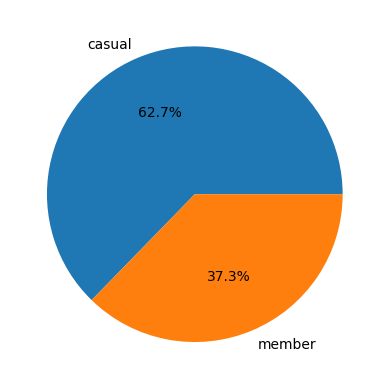

In [ ]:
no_return.groupby('member_casual').size().plot(kind='pie', autopct='%.1f%%')

## find patterns on non returned bikes

In [ ]:


def patter_no_return(df):
    # by unique member status
    member_type_no_return = df['member_casual'].value_counts()
    print('member', member_type_no_return)

    #by_unique start station
    start_no_return = df['start_station_name'].value_counts()
    print('start_station', start_no_return)

patter_no_return(no_return)




member member_casual
casual    1098
member     653
Name: count, dtype: int64
start_station start_station_name
Jefferson Dr & 14th St SW                                24
Smithsonian-National Mall / Jefferson Dr & 12th St SW    20
17th St & Independence Ave SW                            16
1st & M St NE                                            15
Maine Ave & 9th St SW                                    15
                                                         ..
Queens Chapel & Hamilton St                               1
Kenmore Ave & Seminary Rd                                 1
Wisconsin Ave & Ingomar St NW                             1
Pleasant St & MLK Ave SE                                  1
Main Line Blvd & E Glebe                                  1
Name: count, Length: 539, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



classicbikes.info()



<class 'pandas.core.frame.DataFrame'>
Index: 902901 entries, 0 to 1411292
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             902901 non-null  object        
 1   rideable_type       902901 non-null  object        
 2   started_at          902901 non-null  datetime64[ns]
 3   ended_at            902901 non-null  datetime64[ns]
 4   start_station_name  902892 non-null  object        
 5   start_station_id    902892 non-null  float64       
 6   end_station_name    901150 non-null  object        
 7   end_station_id      901150 non-null  float64       
 8   start_lat           902901 non-null  float64       
 9   start_lng           902901 non-null  float64       
 10  end_lat             901397 non-null  float64       
 11  end_lng             901397 non-null  float64       
 12  member_casual       902901 non-null  object        
 13  lost                902901 non-nu

/tmp/ipykernel_10008/1613169133.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classicbikes['hour']=classicbikes['started_at'].dt.hour


<Axes: xlabel='hour', ylabel='Count'>

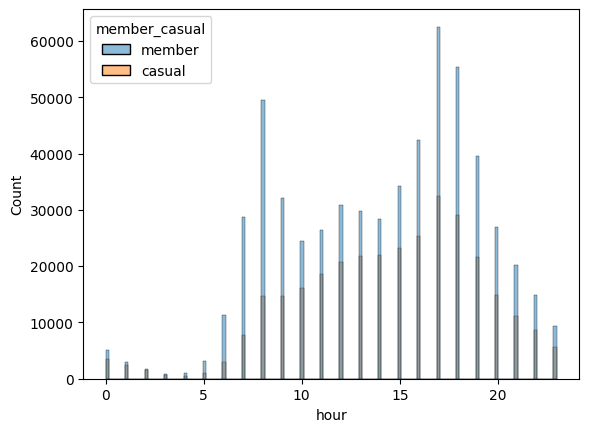

In [ ]:


sns.histplot(x='hour',data=classicbikes, hue='member_casual' )

In [ ]:
classicbikes['day']=classicbikes['started_at'].dt.day

no_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1751 entries, 2842 to 1411292
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             1751 non-null   object        
 1   rideable_type       1751 non-null   object        
 2   started_at          1751 non-null   datetime64[ns]
 3   ended_at            1751 non-null   datetime64[ns]
 4   start_station_name  1749 non-null   object        
 5   start_station_id    1749 non-null   float64       
 6   end_station_name    0 non-null      object        
 7   end_station_id      0 non-null      float64       
 8   start_lat           1751 non-null   float64       
 9   start_lng           1751 non-null   float64       
 10  end_lat             247 non-null    float64       
 11  end_lng             247 non-null    float64       
 12  member_casual       1751 non-null   object        
 13  lost                1751 non-null   int64      

/tmp/ipykernel_10008/738964938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classicbikes['day']=classicbikes['started_at'].dt.day


In [ ]:
# import folium
# map_dc = folium.Map(location=[38.8951100, -77.0363700], zoom_start=11, min_zoom=10, )

# for indice,ride in no_return.iterrows():    
#     folium.Marker(
#         location=[ride['start_lat'], ride['start_lng']],
#         tooltip="Lost!",
#         popup=ride['start_station_name'],
#         icon=folium.Icon(color="red",icon="circle-dot", prefix='fa')).add_to(map_dc)
    

    

# classicbikes_one_day_returned = classicbikes_one_day[classicbikes_one_day['lost']==0]
    

    
# for indice,ride in classicbikes_one_day_returned.iterrows():    
#     folium.Marker(
#         location=[ride['start_lat'], ride['start_lng']],
#         tooltip="not lost",
#         popup=ride['start_station_name'],
#         icon=folium.Icon(color="blue",icon="circle-dot", prefix='fa')).add_to(map_dc)



map_dc

<Axes: xlabel='hour', ylabel='ride_id'>

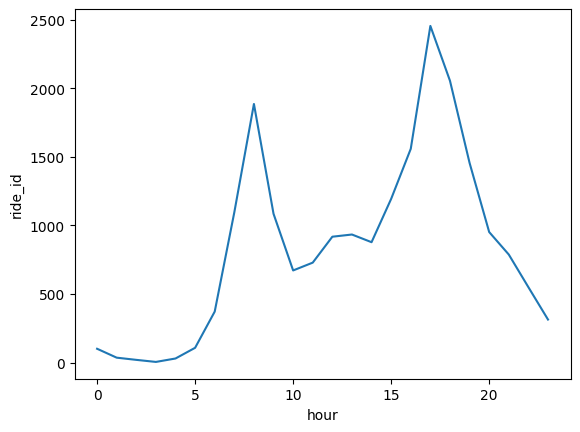

In [ ]:


classicbikes_one_day=classicbikes[classicbikes['day']==31]
df_hour = classicbikes_one_day.groupby(['hour']).count()
sns.lineplot(x='hour', y='ride_id', data=df_hour)

In [ ]:
df_hour_no = no_return.groupby(['hour']).count()
sns.lineplot(x='hour', y='ride_id', data=df_hour_no)

KeyError: 'hour'